## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels as sm
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Using Shape to get the number of rows and columns available in the Dataset
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted == 1').user_id.nunique()/df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Using query to filter only on the notmatching cases for new_page and treatment
df.query('((landing_page == "new_page") & (group != "treatment"))or ((landing_page != "new_page") & (group == "treatment"))').user_id.count()

3893

f. Do any of the rows have missing values?

In [8]:
# Detect missing values.
df.isna().sum().any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#As per the answer in Quiz 2 we need to drop these rows ans they will be misleading in our dataset
# Dropping first the rows with new page and group is control
df2=df.drop( df[((df['landing_page'] == "new_page") & (df['group'] != "treatment"))].index)

In [10]:
# Dropping the second part which the group is treatment and landing page is old page 
df2=df2.drop( df2[((df2['landing_page'] != "new_page") & (df2['group'] == "treatment"))].index)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2['user_id'].duplicated()==True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
df2.query(' user_id  ==773192 ')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
#using Drop to remove the duplicated record
df2.drop(df2[df2['user_id'].duplicated()==True].index,inplace=True)

In [16]:
#chcecking if changes are done correctly or not 
df2.query(' user_id  ==773192 ')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
p_c=df2.query('(group == \"control\")').converted.sum()/df2.query('group == \"control\"').user_id.count()
p_c

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
p_t=df2.query('(group == \"treatment\")').converted.sum()/df2.query('group == \"treatment\"').user_id.count()
p_t

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
df2.query('landing_page == \"new_page\"').user_id.count()/df2.user_id.count()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

- There's no sufficient evidence to say of the New treatement page lead to more conversions as we didn't create our smapling distribution to check the P-Val and compare it to Type I error value 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H0: p_{new} - p_{old} \leq 0$$
$$H1: p_{new} - p_{old} > 0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_old=df2.converted.mean()
p_old

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_new=df2.converted.mean()
p_new

0.11959708724499628

c. What is $n_{new}$?

In [22]:
n_new=df2.query('(landing_page == "new_page")').user_id.count()
n_new

145310

d. What is $n_{old}$?

In [23]:
n_old=df2.query('(landing_page == "old_page")').user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted=np.random.binomial(1,p_new,n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted=np.random.binomial(1,p_old,n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
p_news=new_page_converted.sum()/len(new_page_converted)
p_olds=old_page_converted.sum()/len(old_page_converted)

p_news - p_olds

0.002104078568674006

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
# Sampling distribution 
p_diffs = []

#Simulating p_new and p_old 10000 times
new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old

#Finding p_diffs
p_diffs = new_page_converted - old_page_converted

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'Number of occurrence')

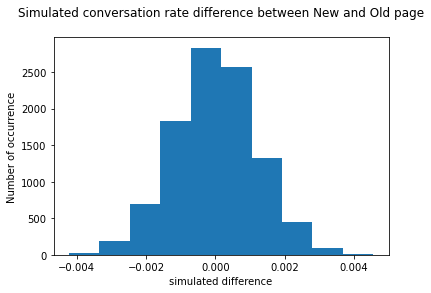

In [28]:
plt.hist(p_diffs)
plt.title('Simulated conversation rate difference between New and Old page\n')
plt.xlabel('simulated difference')
plt.ylabel('Number of occurrence')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

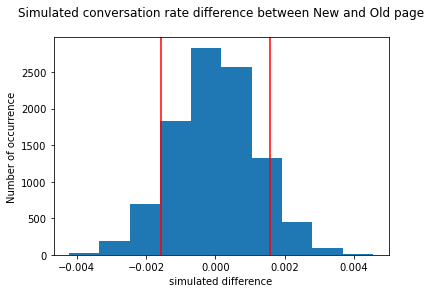

In [30]:
obbs_diff=p_t-p_c
obbs_diff
plt.hist(p_diffs)
plt.title('Simulated conversation rate difference between New and Old page\n')
plt.xlabel('simulated difference')
plt.ylabel('Number of occurrence')
plt.axvline(obbs_diff ,color='red')
plt.axvline(p_diffs.mean() + (p_diffs.mean() - obbs_diff) ,color='red')

In [31]:
# getting the greater portion of the simulated difference from the obsereved difference\n",

p_val= (p_diffs > obbs_diff).mean()
p_val

0.9066

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- We computed the P-Val for differences between the simulated differnces and the actual difference whcih called Scientifically **P-Val** , Based on the out Value which is greater than our α (0.05) we failed to reject the Null Hypotheses

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm
# creating the converted old and converted new numbers 
convert_old = df2.query('(landing_page == \"old_page\")')['converted'].sum()
convert_new = df2.query('(landing_page == \"new_page\")')['converted'].sum()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
# using the ztest to simulate the test statistics and the p-value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],alternative='smaller')
print ('z-score is {} \nP-Val is {}'.format(z_score,p_value))

z-score is 1.3109241984234394 
P-Val is 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- Actually the z-score says that the differnce between the means of old to new page is 1.31 Standered defiation more than the differnce mean which is 90% higher than our Mean differences ,which mean that the old conversion rates are better than new page , also P-Value is 0.905 which is still greater than our α  0.05 so both come to the same conclusion that we failed to reject the null hypothesis

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
df_reg=df.copy()
df_reg.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [36]:
# creating the Dummy Variable for landing page
df_reg[['ab_page','old_page']]=pd.get_dummies(df_reg['landing_page'])

#creating the intercept column
df_reg['intercept']=1

In [37]:
# Dropping the unnecessary column and update the dataset with the change
df_reg.drop(columns=['old_page'],inplace=True)

#checking if all the steps are done correctly 
df_reg.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
#creating the logistic Model with intercept and ab_page as explantory and converted as the response 
mlm=sm.Logit(df_reg['converted'],df_reg[['intercept','ab_page']])

#fitting our model
mod=mlm.fit()

Optimization terminated successfully.
         Current function value: 0.366242
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
# chcecking the stats out of our logistic Model
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Fri, 17 Jun 2022   Pseudo R-squ.:               8.680e-06
Time:                        02:25:23   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1712
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9879      0.008   -248.305      0.000      -2.004      -1.972
ab_page       -0.0155      0.011     -1.368      0.171      -0.038       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- P-value is **0.171** which is a Slightly lower than we have got from the A/B test and says the same that we failed reject the Null Hypotheses as it's still greater than **α (0.05)** ,Also we have seen that for each convertion rate it _decrease_ with **1.01** if it's coming from the new page than the old page

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- We need to find other aspects as it seems. only having the new page not enough as it's not satisfactory to reject the null so we need to dig deep alittle with new parameter we can use the duration spent on each page, we can add also the age and the country to see which are causing the failer of the new page and how we can improve it or for which portion we need to use the new page and for which users we should keep the old page , also we can increase the xperment type to make sure it's not becasue of _Change Aversion_

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df_reg.set_index('user_id'), how='inner')

In [41]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [42]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new.country)

In [43]:
### Fit Your Linear Model And Obtain the Results
lmo=sm.Logit(df_new['converted'],df_new[['intercept','CA','UK','ab_page']])
modl=lmo.fit()

# checking the Stats of the logistic model with the added variables 
modl.summary2()

Optimization terminated successfully.
         Current function value: 0.366238
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              215705.9690
Date:               2022-06-17 02:28 BIC:              215748.3408
No. Observations:   294478           Log-Likelihood:   -1.0785e+05
Df Model:           3                LL-Null:          -1.0785e+05
Df Residuals:       294474           LLR p-value:      0.21575    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9885    0.0088  -225.2669  0.0000  -2.0058  -1.9712
CA           -0.0357    0.0266    -1.3380  0.1809  -0.0879   0.0166
UK            0.0093    0.0132     0.7016  0.4829  -0.0166   0.0352
ab_page      -0.0155    0.0114    -1.3645  0.1724  -0.0378   0.0068
==================================================================

"""

- After Adding the Country aspect to the dataset it seems also there's no significance difference as all the p-values are still greater than α (0.05)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
# creating the new necessary columns for the interactions
df_new['ca_newpage']=df_new['CA']*df_new['ab_page']
df_new['uk_newpage']=df_new['UK']*df_new['ab_page']
df_new['us_newpage']=df_new['US']*df_new['ab_page']

In [45]:
# Creating our Logistic Regression model adding the new interaction variables 
# we'll use the us_newpage as a Base as well as US as a base for the country.
lmo1=sm.Logit(df_new['converted'],df_new[['intercept','ca_newpage','uk_newpage','ab_page','CA','UK']])

#Fitting the model
modl1=lmo1.fit()

#Checking the Stats out of our new model
modl1.summary2()

Optimization terminated successfully.
         Current function value: 0.366233
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              215707.0143
Date:               2022-06-17 02:30 BIC:              215770.5720
No. Observations:   294478           Log-Likelihood:   -1.0785e+05
Df Model:           5                LL-Null:          -1.0785e+05
Df Residuals:       294472           LLR p-value:      0.19148    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9850    0.0096  -207.7224  0.0000  -2.0037  -1.9663
ca_newpage   -0.0444    0.0533    -0.8319  0.4054  -0.1488   0.0601
uk_newpage    0.0365    0.0264     1.3824  0.1668  -0.0153   0.0883
ab_page      -0.0225    0.0136    -1.6590  0.0971  -0.0491   0.0041
CA           -0.0137    0.0374    -0.3656  0.7146  -0.0869   0.0596
UK           -0.0089    0.0187    -0.4775  0.6330  -0.0455   0.0277
==================================================================

"""

- After looking into the interaction it seems that there's still no significant for the interactions also so no change we still failed to reject the Null Hypothesis

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 
> - As a conculsions to all the above excersis we have came to the same result using 3 different methods which proves that our finidgs are accuarate 
> - Based on the above finidings i advice the owner to keep the old Page 
> - Next Actions
    >> - I Advice to increase the duration for the test to make sure that we didn't fall into Change Aversion Problem
    >> - Adding new aspects to the test (i.e duration spent on each page , Age of the user , interests of the user) so we can determine the changes if required to a specific portion of users and also 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.